## Learning Word Vectors with TensorFlow: Optimizer Selection
### Stochastic Gradient Descent (with Momentum) 
*Patrick Coady (pcoady@alum.mit.edu)*

This notebook explores (with Momentum optimizer):
1. Learning rates
2. Momentum settings

A learning rate of 0.01 with an aggressive momentum of 0.95 does best. A higher learning rate of 0.1 converges in fewer epochs, but consistently has worse training and validation loss.

SGD with momentum consistently achieves better overall performance than RMSProp in this application. With both faster training/validation loss convergence. And, arriving a better solution (i.e. lower training and validation loss).

In [1]:
from wordvector import WordVector
from windowmodel import WindowModel
import docload
from plot_util import plot_results

import numpy as np
import sklearn.utils

In [2]:
files = ['../data/adventures_of_sherlock_holmes.txt',
        '../data/hound_of_the_baskervilles.txt',
        '../data/sign_of_the_four.txt']
word_array, dictionary, num_lines, num_words = docload.build_word_array(
    files, vocab_size=50000, gutenberg=True)
print('Document loaded and processed: {} lines, {} words.'
      .format(num_lines, num_words))

Document loaded and processed: 24080 lines, 244986 words.


In [3]:
x, y = WindowModel.build_training_set(word_array)

# shuffle and split 10% validation data
x_shuf, y_shuf = sklearn.utils.shuffle(x, y, random_state=0)
split = round(x_shuf.shape[0]*0.9)
x_val, y_val = (x_shuf[split:, :], y_shuf[split:, :])
x_train, y_train = (x[:split, :], y[:split, :])

## Learning Rate and Momentum

learn_rate = {0.0001, 0.001, 0.01}  
momentum = {0.8, 0.9, 0.95}

In [4]:
results_list = []
count = 0
for learn_rate in [0.0001, 0.001, 0.01]:
    for momentum in [0.8, 0.9, 0.95]: 
        print('{}) learn_rate = {}, momentum = {}'
              .format(count, learn_rate, momentum))
        count += 1
        graph_params = {'batch_size': 32,
                        'vocab_size': np.max(x)+1,
                        'embed_size': 128,
                        'hid_size': 128,
                        'neg_samples': 64,
                        'learn_rate': learn_rate,
                        'momentum': momentum,
                        'embed_noise': 0.1,
                        'hid_noise': 0.1,
                        'optimizer': 'Momentum'}
        model = WindowModel(graph_params)
        results = model.train(x_train, y_train, x_val, y_val, epochs=80, verbose=False)
        results_list.append((graph_params, results))

0) learn_rate = 0.0001, momentum = 0.8
End Training: total batches = 551200. train loss = 5.16, val loss = 5.16
1) learn_rate = 0.0001, momentum = 0.9
End Training: total batches = 551200. train loss = 5.00, val loss = 5.01
2) learn_rate = 0.0001, momentum = 0.95
End Training: total batches = 551200. train loss = 4.63, val loss = 4.63
3) learn_rate = 0.001, momentum = 0.8
End Training: total batches = 551200. train loss = 4.35, val loss = 4.35
4) learn_rate = 0.001, momentum = 0.9
End Training: total batches = 551200. train loss = 3.56, val loss = 3.58
5) learn_rate = 0.001, momentum = 0.95
End Training: total batches = 551200. train loss = 2.23, val loss = 2.30
6) learn_rate = 0.01, momentum = 0.8
End Training: total batches = 551200. train loss = 1.51, val loss = 1.69
7) learn_rate = 0.01, momentum = 0.9
End Training: total batches = 551200. train loss = 0.80, val loss = 1.17
8) learn_rate = 0.01, momentum = 0.95
End Training: total batches = 551200. train loss = 0.66, val loss = 1.1

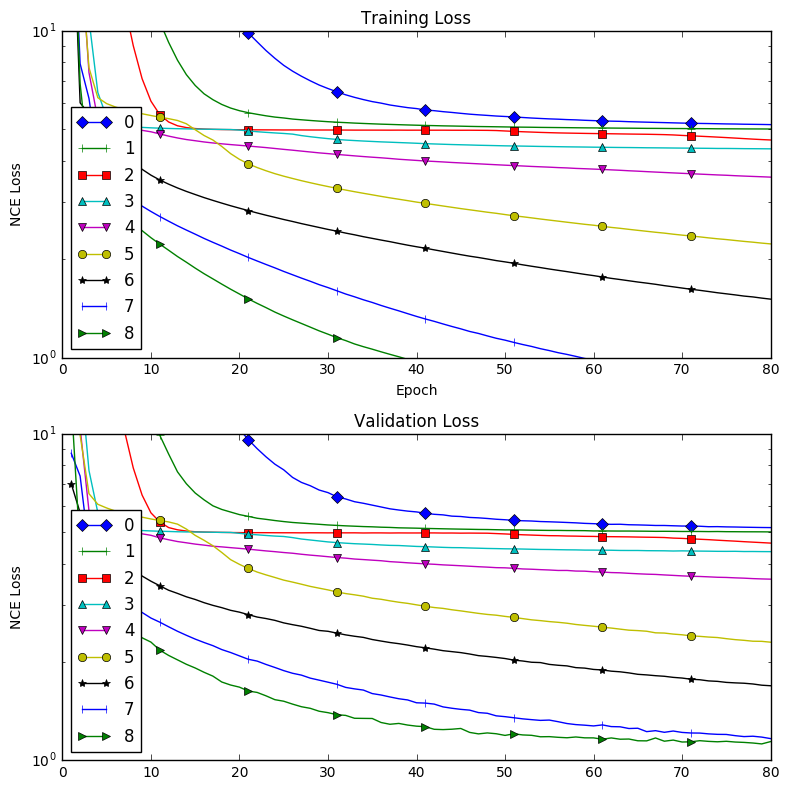

In [5]:
plot_results(results_list)

## Check Larger Learning Rates

**First round found best learn rate was 0.01, another round to check even larger learning rates**  

learn_rate = {0.1, 1, 10}  
momentum = {0.8, 0.9, 0.95}

In [6]:
results_list2= []
count = 0
for learn_rate in [0.1, 1, 10]:
    for momentum in [0.8, 0.9, 0.95]: 
        print('{}) learn_rate = {}, momentum = {}'
              .format(count, learn_rate, momentum))
        count += 1
        graph_params = {'batch_size': 32,
                        'vocab_size': np.max(x)+1,
                        'embed_size': 128,
                        'hid_size': 128,
                        'neg_samples': 64,
                        'learn_rate': learn_rate,
                        'momentum': momentum,
                        'embed_noise': 0.1,
                        'hid_noise': 0.1,
                        'optimizer': 'Momentum'}
        model = WindowModel(graph_params)
        results = model.train(x_train, y_train, x_val, y_val, epochs=80, verbose=False)
        results_list2.append((graph_params, results))

0) learn_rate = 0.1, momentum = 0.8
End Training: total batches = 551200. train loss = 1.25, val loss = 1.60
1) learn_rate = 0.1, momentum = 0.9
End Training: total batches = 551200. train loss = 3.50, val loss = 3.80
2) learn_rate = 0.1, momentum = 0.95
End Training: total batches = 551200. train loss = 8.50, val loss = 7.99
3) learn_rate = 1, momentum = 0.8
End Training: total batches = 551200. train loss = 19.22, val loss = 19.82
4) learn_rate = 1, momentum = 0.9
End Training: total batches = 551200. train loss = 34.46, val loss = 32.33
5) learn_rate = 1, momentum = 0.95
End Training: total batches = 551200. train loss = 65.25, val loss = 66.63
6) learn_rate = 10, momentum = 0.8
End Training: total batches = 551200. train loss = 303.23, val loss = 260.32
7) learn_rate = 10, momentum = 0.9
End Training: total batches = 551200. train loss = 377.16, val loss = 387.57
8) learn_rate = 10, momentum = 0.95
End Training: total batches = 551200. train loss = 956.64, val loss = 987.69


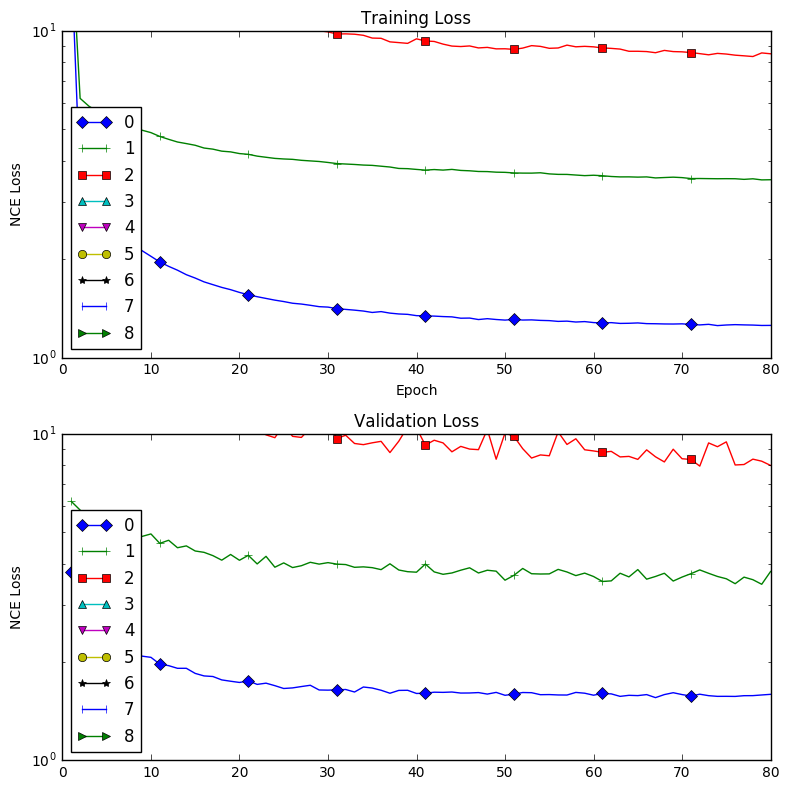

In [7]:
plot_results(results_list2)